In [1]:
print('Corona Screening Test')

Corona Screening Test


In [2]:
import pandas as pd

# Read Data

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
0,98.090554,0,10,0,0,1
1,99.543885,0,58,1,0,0
2,99.831415,0,8,0,0,1
3,100.090138,0,89,0,1,0
4,101.119591,1,33,0,0,1


In [5]:
df.tail()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
3011,99.577139,1,64,1,-1,0
3012,101.513452,0,85,0,-1,0
3013,99.197957,0,23,1,-1,1
3014,100.483381,1,51,0,-1,1
3015,98.906125,1,79,0,-1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fever          3016 non-null   float64
 1   bodyPain       3016 non-null   int64  
 2   age            3016 non-null   int64  
 3   runnyNose      3016 non-null   int64  
 4   diffBreath     3016 non-null   int64  
 5   infectionProb  3016 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 141.5 KB


In [7]:
df['diffBreath'].value_counts()

 0    1032
-1    1011
 1     973
Name: diffBreath, dtype: int64

In [8]:
df.describe()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
count,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000
mean,100.002842,0.504973,50.609085,0.497016,-0.012599,0.499668
std,1.142058,0.500058,28.824833,0.500074,0.811101,0.500083
min,98.002796,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,99.024492,0.000000,26.000000,0.000000,-1.000000,0.000000
50%,100.009168,1.000000,51.000000,0.000000,0.000000,0.000000
75%,100.992547,1.000000,75.000000,1.000000,1.000000,1.000000
max,101.997953,1.000000,100.000000,1.000000,1.000000,1.000000


# Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C1BD00288>,
      dtype=object)

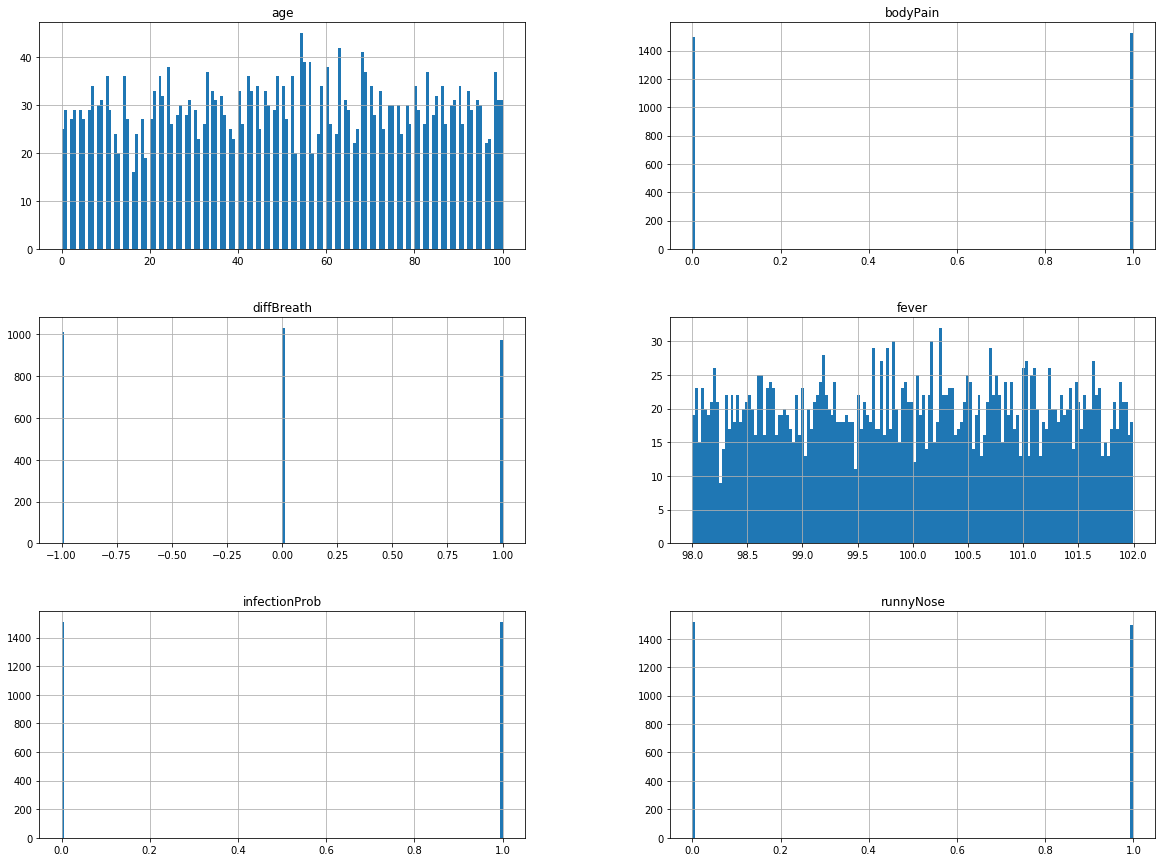

In [9]:
df.hist(bins=150, figsize=(20,15))

# Train Test Splitting

In [10]:
import numpy as np

In [11]:
def data_split(data, ratio):
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * ratio)
    
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
# or can use train_test_split funtion from sklearn

In [12]:
np.random.permutation(7)

array([0, 1, 3, 2, 5, 6, 4])

In [13]:
train, test = data_split(df, 0.2)

In [14]:
train

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
1895,99.035080,1,100,0,1,1
2318,98.106456,1,16,0,0,1
2300,98.109034,1,38,0,-1,0
1008,100.244795,1,94,1,-1,0
593,98.912234,0,54,1,-1,0
...,...,...,...,...,...,...
1122,98.330039,0,14,1,0,0
43,99.835940,1,1,0,-1,1
467,100.332985,0,18,0,1,1
1330,98.677761,0,85,1,0,1


In [15]:
test

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
1207,98.555492,1,33,1,0,0
1089,101.485151,0,76,1,-1,0
1231,100.958256,1,75,1,-1,1
40,101.585959,0,5,1,0,1
1239,100.353055,1,35,1,0,0
...,...,...,...,...,...,...
278,98.228739,1,13,0,-1,0
1831,99.942725,1,79,1,-1,1
1610,99.487816,0,12,1,-1,1
2094,99.748364,1,11,1,1,0


In [16]:
X_train = train[['fever','bodyPain','age','runnyNose','diffBreath']].to_numpy()
X_test = test[['fever','bodyPain','age','runnyNose','diffBreath']].to_numpy()

In [17]:
Y_train = train[['infectionProb']].to_numpy().reshape(2413,)
Y_test = test[['infectionProb']].to_numpy().reshape(603,) #according to sklearn reshape(size of data,)

In [18]:
Y_train

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [19]:
X_train

array([[ 99.03508048,   1.        , 100.        ,   0.        ,
          1.        ],
       [ 98.10645601,   1.        ,  16.        ,   0.        ,
          0.        ],
       [ 98.10903425,   1.        ,  38.        ,   0.        ,
         -1.        ],
       ...,
       [100.3329855 ,   0.        ,  18.        ,   0.        ,
          1.        ],
       [ 98.67776125,   0.        ,  85.        ,   1.        ,
          0.        ],
       [100.2446496 ,   0.        ,  76.        ,   0.        ,
         -1.        ]])

# Feature Scalling

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [23]:
X_train,X_test

(array([[-0.83805618,  0.99958566,  1.71453319, -0.98315063,  1.25366406],
        [-1.6499501 ,  0.99958566, -1.22678106, -0.98315063,  0.02744137],
        [-1.64769596,  0.99958566, -0.45643685, -0.98315063, -1.19878132],
        ...,
        [ 0.29669875, -1.00041451, -1.15674977, -0.98315063,  1.25366406],
        [-1.15045944, -1.00041451,  1.1892985 ,  1.01713813,  0.02744137],
        [ 0.21946691, -1.00041451,  0.87415769, -0.98315063, -1.19878132]]),
 array([[-1.30945896,  0.95300989, -0.5340041 ,  0.96255783, -0.033532  ],
        [ 1.27524998, -1.04930706,  0.90981157,  0.96255783, -1.29726922],
        [ 0.81039426,  0.95300989,  0.87623447,  0.96255783, -1.29726922],
        ...,
        [-0.48691007, -1.04930706, -1.23912338,  0.96255783, -1.29726922],
        [-0.25704048,  0.95300989, -1.27270049,  0.96255783,  1.23020523],
        [ 0.99378074,  0.95300989, -1.17196917,  0.96255783, -0.033532  ]]))

# Using Logistics Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf = LogisticRegression()
clf.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
clf.predict(sc_X.transform(np.array([[100,1,21,1,1]]))) # provides us with 0 or 1 (whether we have infec or not)

array([0], dtype=int64)

In [44]:
inputFeatures = sc_X.transform(np.array([[104,0,50,0,0]]))
infProb = clf.predict_proba(inputFeatures)[0][1]

In [45]:
infProb

0.50940302244623

In [29]:
y_pred = clf.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(Y_test,y_pred)

# We can calculate accuracy using confusion matrix

array([[141, 173],
       [118, 171]], dtype=int64)

In [38]:
(141+171)/(141+173+118+171) # This is accuracy

0.5174129353233831

# SVM

In [33]:
from sklearn.svm import SVC

In [34]:
clf = SVC(kernel = 'linear',probability=True)
clf.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [52]:
inputFeatures = sc_X.transform(np.array([[99,1,40,0,-1]]))
infProb = clf.predict_proba(inputFeatures)[0][1]

In [53]:
infProb

0.5094024309503972

In [55]:
y_pred = clf.predict(X_test)

In [56]:
confusion_matrix(Y_test,y_pred)

# We can calculate accuracy using confusion matrix

array([[164, 150],
       [149, 140]], dtype=int64)

In [57]:
(140+164)/(164+150+149+140) # This is accuracy, can also use function

0.5041459369817579